In [10]:
import numpy as np      
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
pip install lightgbm

     |████████████████████████████████| 1.2 MB 1.1 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [2]:
train_data = pd.read_csv('training_set_label.csv')
test_data = pd.read_csv('testing_set_label.csv')

In [5]:
train_data.corr()

,Unnamed: 0,latitude,longitude,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,...,is_consulting,is_othercategory,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500
Unnamed: 0,1.000000,0.054726,0.023292,-0.004507,-0.116533,-0.135614,-0.131698,-0.079950,-0.118456,-0.064169,...,-0.040929,0.006243,-0.040057,0.134044,-0.076568,-0.135289,-0.090922,-0.081123,0.026713,0.026019
latitude,0.054726,1.000000,0.368475,-0.046868,-0.041692,-0.072000,-0.054275,-0.039198,-0.000659,-0.072941,...,-0.033905,-0.039656,0.031045,0.028891,-0.033072,-0.011801,-0.057762,-0.018825,-0.018176,0.032675
longitude,0.023292,0.368475,1.000000,-0.014158,-0.000148,-0.051674,-0.087701,-0.073197,0.022447,0.017970,...,0.021244,-0.046560,0.024852,0.102001,-0.066288,-0.067017,-0.042309,-0.042854,-0.045191,-0.091913
age_first_funding_year,-0.004507,-0.046868,-0.014158,1.000000,0.762382,0.593526,0.472029,-0.187817,-0.155478,0.046350,...,-0.012596,0.115649,0.168140,-0.345985,-0.293081,-0.060532,0.033388,0.121338,0.114363,0.050638
age_last_funding_year,-0.116533,-0.041692,-0.000148,0.762382,1.000000,0.687515,0.632099,0.073080,0.385999,0.116371,...,0.029712,0.091918,0.351044,-0.354470,-0.099762,0.258928,0.317469,0.312340,0.122893,0.200727
age_first_milestone_year,-0.135614,-0.072000,-0.051674,0.593526,0.687515,1.000000,0.777484,0.245364,0.195207,0.063900,...,0.063367,0.031647,0.109566,-0.278960,0.014977,0.190824,0.209076,0.253121,0.055704,0.155329
age_last_milestone_year,-0.131698,-0.054275,-0.087701,0.472029,0.632099,0.777484,1.000000,0.348534,0.262056,0.093529,...,0.047602,-0.001843,0.089589,-0.249427,0.113306,0.261767,0.278814,0.252636,0.083480,0.206859
relationships,-0.079950,-0.039198,-0.073197,-0.187817,0.073080,0.245364,0.348534,1.000000,0.358883,0.093790,...,0.078289,-0.073963,-0.028938,-0.060625,0.317130,0.285015,0.259842,0.207488,0.115061,0.222207
funding_rounds,-0.118456,-0.000659,0.022447,-0.155478,0.385999,0.195207,0.262056,0.358883,1.000000,0.115800,...,0.028304,-0.012769,0.334832,0.010606,0.260598,0.444454,0.440923,0.323620,0.043044,0.259345
funding_total_usd,-0.064169,-0.072941,0.017970,0.046350,0.116371,0.063900,0.093529,0.093790,0.115800,1.000000,...,-0.001829,-0.011932,0.010060,-0.059650,-0.023721,0.020119,0.045405,0.045146,0.046250,0.048978


In [7]:
cat_features = train_data.select_dtypes(include= 'object')

In [12]:
train_data = train_data.drop(['state_code','id','Unnamed: 6','state_code.1','category_code','object_id'],axis=1)
test_data = test_data.drop(['state_code','id','Unnamed: 6','state_code.1','category_code','object_id'],axis=1)
train_data = train_data.drop(['zip_code','founded_at','closed_at','first_funding_at','last_funding_at','city','name'],axis=1)
test_data = test_data.drop(['zip_code','founded_at','closed_at','first_funding_at','last_funding_at','city','name'],axis=1)
train_data = train_data.drop(['Unnamed: 0'],axis=1)
test_data = test_data.drop(['Unnamed: 0'],axis=1)
train_data = train_data.drop(['latitude','longitude'],axis=1)
test_data = test_data.drop(['latitude','longitude'],axis=1)

In [13]:
train_data['status'].replace('closed',0,inplace=True)
train_data['status'].replace('acquired',1,inplace=True)

/Users/deekshitha/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='status', ylabel='count'>

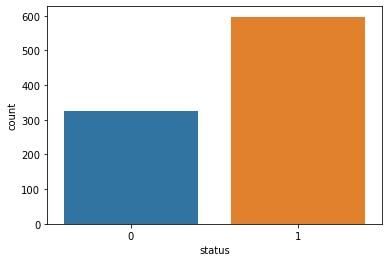

In [14]:
sns.countplot(train_data['status'])

In [16]:
cat_feature = train_data.select_dtypes(include='object')

In [17]:
train_data['age_first_milestone_year'] = train_data['age_first_milestone_year'].fillna(train_data['age_first_milestone_year'].median())
test_data['age_first_milestone_year'] = test_data['age_first_milestone_year'].fillna(train_data['age_first_milestone_year'].median())
train_data['age_last_milestone_year'] = train_data['age_last_milestone_year'].fillna(train_data['age_last_milestone_year'].median())
test_data['age_last_milestone_year'] = test_data['age_last_milestone_year'].fillna(train_data['age_last_milestone_year'].median())

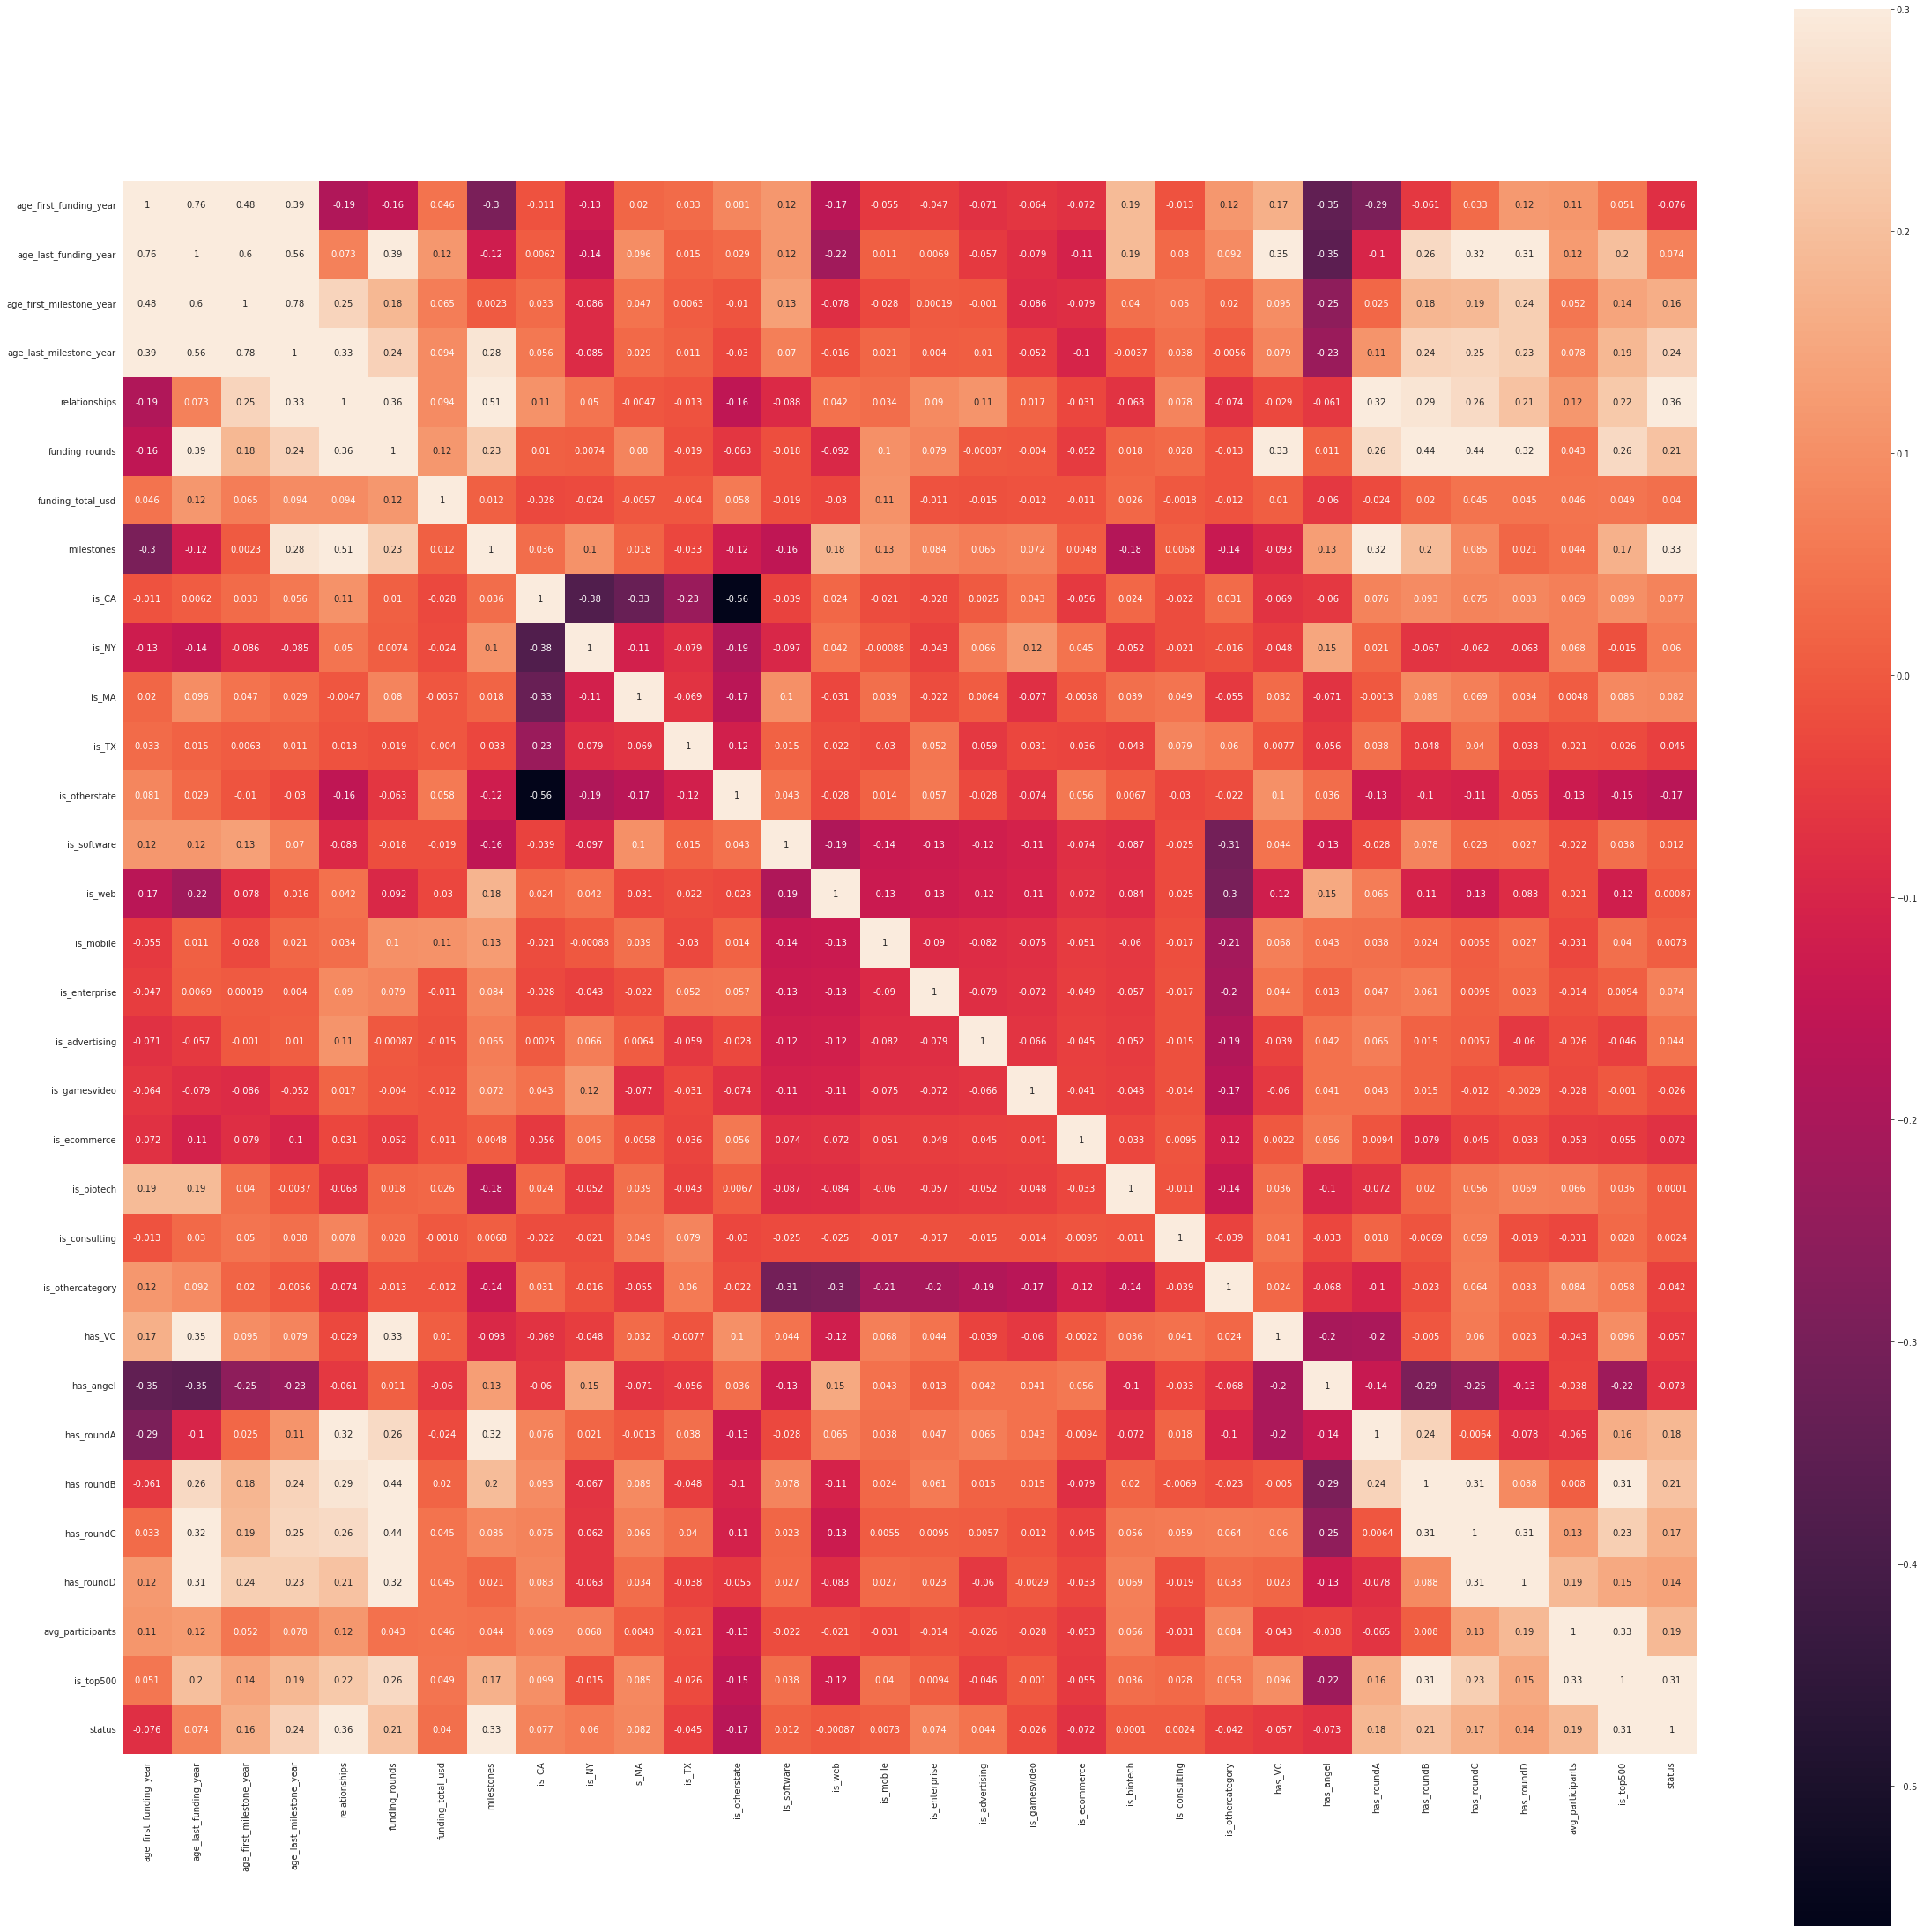

In [18]:
corr =train_data.corr()
mask = np.zeros_like(corr)
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(40, 40))
    ax = sns.heatmap(corr, mask=mask, vmax=.3, square=True,annot=True)

In [19]:
X = train_data.drop('status', axis = 1)   
y = train_data['status']             
x_test = test_data

In [20]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X =  sc.fit_transform(X)

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [22]:
print("Shape of the X Train :", X_train.shape)
print("Shape of the y Train :", y_train.shape)
print("Shape of the X test :", X_test.shape)
print("Shape of the y test :", y_test.shape)
print("Shape of the test data :", x_test.shape)

Shape of the X Train : (738, 31)
Shape of the y Train : (738,)
Shape of the X test : (185, 31)
Shape of the y test : (185,)
Shape of the test data : (231, 31)


/Users/deekshitha/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Training Accuracy : 0.7953929539295393
Testing Accuracy : 0.7351351351351352


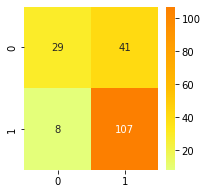

              precision    recall  f1-score   support

           0       0.78      0.41      0.54        70
           1       0.72      0.93      0.81       115

    accuracy                           0.74       185
   macro avg       0.75      0.67      0.68       185
weighted avg       0.75      0.74      0.71       185

roc_auc 0.6723602484472049


In [30]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
rf = RandomForestClassifier(bootstrap=False, max_depth=12, min_samples_leaf=100, min_samples_split=20,
                       n_estimators=100,criterion='entropy',n_jobs=1000,max_leaf_nodes=100,max_features='auto'
                           )

    
rf.fit(X,y)


y_pred_rf = rf.predict(X_test)

print("Training Accuracy :", rf.score(X_train, y_train))
print("Testing Accuracy :", rf.score(X_test, y_test))

cm = confusion_matrix(y_test, y_pred_rf)
plt.rcParams['figure.figsize'] = (3, 3)
sns.heatmap(cm, annot = True, cmap = 'Wistia', fmt = '.8g')
plt.show()

cr = classification_report(y_test, y_pred_rf)
print(cr)

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,y_pred_rf)
roc_auc = auc(false_positive_rate, true_positive_rate)
print("roc_auc",roc_auc)